# Fashion MNIST - Multi-class classification model

**Name: Zhang Jieyuan** <br>

Dataset: Fashion-MNIST is available at https://github.com/zalandoresearch/fashion-mnist <br>

* Aimed to build a multi-class classification model using a convolutional neural network for Fashion-MNIST dataset. 
* Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10. 

## Import TensorFlow

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
%matplotlib inline


tf.random.set_seed(2022)

## Import Dataset

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist 
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

## Reshaping Data

In [3]:
# As training set is 60,000 examples and test set is 10,000 examples 
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

# As it is greyscale image-> the pixel will range from 0 - 255
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

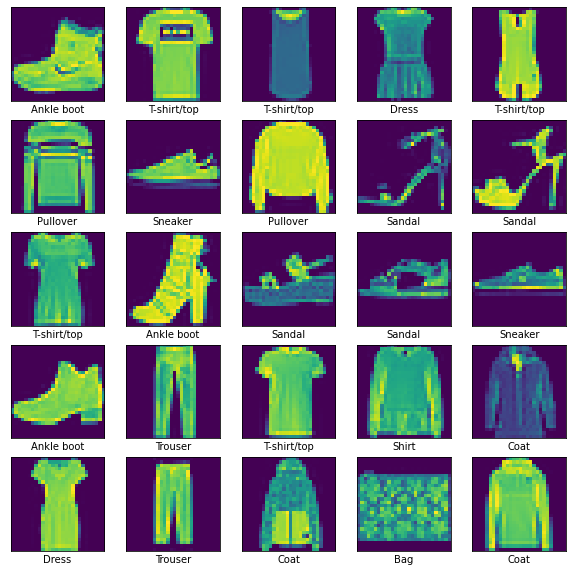

In [4]:
#Print out 25 from training image to check if the label is correct.

class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']


plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Building Model


### Convolutional Base

In [5]:
#Building Convolutional Base
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

#Add dense layers
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

#Compile and Train Model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, validation_data=(test_images, test_labels), epochs=5, batch_size=32)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

## Building Confusion Matrix

In [6]:
#predict the outcome of test set; result is the softmax probability
y_pred_test_raw=model.predict(test_images)

#from the class with highest softmax probabiity as the predict outcome
y_pred_test=np.argmax(y_pred_test_raw, axis=1)

# Create Confusion Matrix
confusionMatrix=confusion_matrix(test_labels,y_pred_test)
print(confusionMatrix)

[[869   0  24  28   7   2  64   0   6   0]
 [  0 967   0  22   6   0   2   0   3   0]
 [ 14   0 873   9  68   0  35   0   1   0]
 [  8   1  10 895  64   0  17   0   5   0]
 [  1   0  37  11 928   1  22   0   0   0]
 [  0   0   0   0   0 977   0  19   0   4]
 [128   0  90  36 114   0 616   0  16   0]
 [  0   0   0   0   0   9   0 979   0  12]
 [  6   0   3   4   3   5   3   4 972   0]
 [  0   0   0   0   0  10   0  43   0 947]]


 ## Precision and Recall

In [7]:
cr=classification_report(test_labels,y_pred_test)
print(cr)

ave = ['micro','macro','weighted']
for i in ave:
    report = "Overall Precision: {}: {}".format(i,metrics.precision_score(test_labels,y_pred_test, average=i))
    print(report)

for i in ave:
    report = "Overall Recall: {}: {}".format(i,metrics.recall_score(test_labels,y_pred_test, average=i))
    print(report)


              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1000
           1       1.00      0.97      0.98      1000
           2       0.84      0.87      0.86      1000
           3       0.89      0.90      0.89      1000
           4       0.78      0.93      0.85      1000
           5       0.97      0.98      0.98      1000
           6       0.81      0.62      0.70      1000
           7       0.94      0.98      0.96      1000
           8       0.97      0.97      0.97      1000
           9       0.98      0.95      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000

Overall Precision: micro: 0.9023
Overall Precision: macro: 0.9032198044935187
Overall Precision: weighted: 0.9032198044935187
Overall Recall: micro: 0.9023
Overall Recall: macro: 0.9023
Overall Recall: weighted: 0.9023


**Result:**

||Precision|Recall|
|--|---|---|
|micro|0.9023|0.9023|
|macro|0.9032|0.9023|
|weighted|0.9032|0.9023|

For recall: Since each class is balanced, the denominator for macro and weighted is the same for all classes, while the numerator is the TP of each class. Hence, when taking an average, the recall for micro, macro and weighted recall are the same.

For micro average, it is taking the global average, hence,  precision = recall = accuracy. For macro average, it is taking the arithmetic mean of all classes. Since the dataset is balanced, the weighted average is same as macro average. Since the recall for all methods are the same which is equal to the precision of micro. 

The **macro average** as an overall method is chosen, as the precision is the simple average by class while recall is also sames as the micro precision. Hence, when comparing the difference between the macro precision and recall, I will also know if there's a class that is having significantly low precision vs the rest.

## Model with Two Branches

In [8]:
# add input layer

inputs= tf.keras.Input(shape=(28, 28,1))

# 1st block
x1=layers.Conv2D(32, (3, 3), activation='relu')(inputs)
x1=layers.MaxPooling2D((2, 2))(x1)
x1=layers.Flatten()(x1)

# 2nd block
x2=layers.Flatten()(inputs)
x2=layers.Dense(64, activation='relu')(x2)

#combine 1st and 2nd block
combined = layers.concatenate([x1, x2])

#create the dense and output layer
d1=layers.Dense(32, activation ='relu')(combined)
outputs=layers.Dense(10, activation='softmax')(d1)


model_FC = tf.keras.Model(inputs, outputs)
model_FC.summary()

#compile and train the model
model_FC.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model_FC.fit(train_images, train_labels, validation_data=(test_images, test_labels), epochs=5)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d_3 (Conv2D)              (None, 26, 26, 32)   320         ['input_1[0][0]']                
                                                                                                  
 max_pooling2d_2 (MaxPooling2D)  (None, 13, 13, 32)  0           ['conv2d_3[0][0]']               
                                                                                                  
 flatten_2 (Flatten)            (None, 784)          0           ['input_1[0][0]']                
                                                                                              